In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
#Importing all the necessory libraries

In [2]:
df=pd.read_csv('UNSW_NB15_training-set.csv')

In [3]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [4]:
df=df.drop(['id'], axis=1)
df=df.drop(['label'], axis=1)

In [5]:
df=df.drop(['service'], axis=1)

In [6]:
X=X = df.drop(columns='attack_cat')

In [7]:
# List of common fake NaN placeholders
fake_nan_values = ['-', '?', '']

# Create a mask and count occurrences
for val in fake_nan_values:
    fake_nan_mask = (X == val)
    count = fake_nan_mask.sum()
    count = count[count > 0]  # Only show columns where the value is found
    if not count.empty:
        print(f"\nPlaceholder '{val}' found in:")
        print(count)


In [8]:
# Frequency encode 'proto'
proto_freq = df['proto'].value_counts(normalize=True)  # relative frequency
df['proto'] = df['proto'].map(proto_freq)

from sklearn.preprocessing import OneHotEncoder

# OneHot encode 'state'
df = pd.get_dummies(df, columns=['state'],dtype=int)

le = LabelEncoder()

# Fit and transform the 'attack_cat' column
df['attack_cat'] = le.fit_transform(df['attack_cat'])

In [9]:
df

,dur,proto,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,attack_cat,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,0.455946,6,4,258,172,74.087490,252,254,1.415894e+04,...,6,0,0,1,0,0,0,0,0,0
1,0.649902,0.455946,14,38,734,42014,78.473372,62,252,8.395112e+03,...,6,0,0,1,0,0,0,0,0,0
2,1.623129,0.455946,8,16,364,13186,14.170161,62,252,1.572272e+03,...,6,0,0,1,0,0,0,0,0,0
3,1.681642,0.455946,12,12,628,770,13.677108,62,252,2.740179e+03,...,6,0,0,1,0,0,0,0,0,0
4,0.449454,0.455946,10,6,534,268,33.373826,254,252,8.561499e+03,...,6,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,5,0,0,0,1,0,0,0,0,0
175337,0.505762,0.455946,10,8,620,354,33.612649,254,252,8.826286e+03,...,8,0,0,1,0,0,0,0,0,0
175338,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,5,0,0,0,1,0,0,0,0,0
175339,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,5,0,0,0,1,0,0,0,0,0


In [10]:
X=X = df.drop(columns='attack_cat')
y=df['attack_cat']

In [11]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Update the dataframe to include the new samples and target
df = X_resampled.copy()
df['attack_cat'] = y_resampled

In [12]:
df

,dur,proto,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,attack_cat
0,0.121478,0.455946,6,4,258,172,74.087490,252,254,14158.942380,...,0,0,1,0,0,0,0,0,0,6
1,0.649902,0.455946,14,38,734,42014,78.473372,62,252,8395.112305,...,0,0,1,0,0,0,0,0,0,6
2,1.623129,0.455946,8,16,364,13186,14.170161,62,252,1572.271851,...,0,0,1,0,0,0,0,0,0,6
3,1.681642,0.455946,12,12,628,770,13.677108,62,252,2740.178955,...,0,0,1,0,0,0,0,0,0,6
4,0.449454,0.455946,10,6,534,268,33.373826,254,252,8561.499023,...,0,0,1,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558342,0.258795,0.455946,10,6,1022,268,57.970149,254,252,28449.327358,...,0,0,1,0,0,0,0,0,0,9
558343,0.249537,0.455946,10,6,1231,268,60.140376,254,252,35639.533783,...,0,0,1,0,0,0,0,0,0,9
558344,0.252715,0.455946,10,6,1127,268,59.410996,254,252,32272.187047,...,0,0,1,0,0,0,0,0,0,9
558345,0.277670,0.455946,10,6,1065,268,55.131802,254,252,27867.775022,...,0,0,1,0,0,0,0,0,0,9


In [92]:
# Map encoded attack_cat values back to their original category names using LabelEncoder
attack_cat_counts = df['attack_cat'].value_counts().sort_index()
attack_cat_names = le.inverse_transform(attack_cat_counts.index)

for name, count in zip(attack_cat_names, attack_cat_counts):
    print(f"{name}: {count}")

Analysis: 55650
Backdoor: 55781
DoS: 57540
Exploits: 56168
Fuzzers: 53676
Generic: 55810
Normal: 56000
Reconnaissance: 55757
Shellcode: 55984
Worms: 55981


In [13]:
X=X = df.drop(columns='attack_cat')
y=df['attack_cat']

In [14]:
corr_matrix = X.corr()

# Get the upper triangle of the correlation matrix (to avoid redundancy)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Remove those columns from X
df = df.drop(columns=to_drop)

# Display the reduced X shape and columns
print(f"Columns removed: {to_drop}")


Columns removed: ['sbytes', 'dbytes', 'sloss', 'dloss', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_srv_dst', 'is_sm_ips_ports', 'state_FIN']


In [15]:
X=X = df.drop(columns='attack_cat')
y=df['attack_cat']

In [16]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

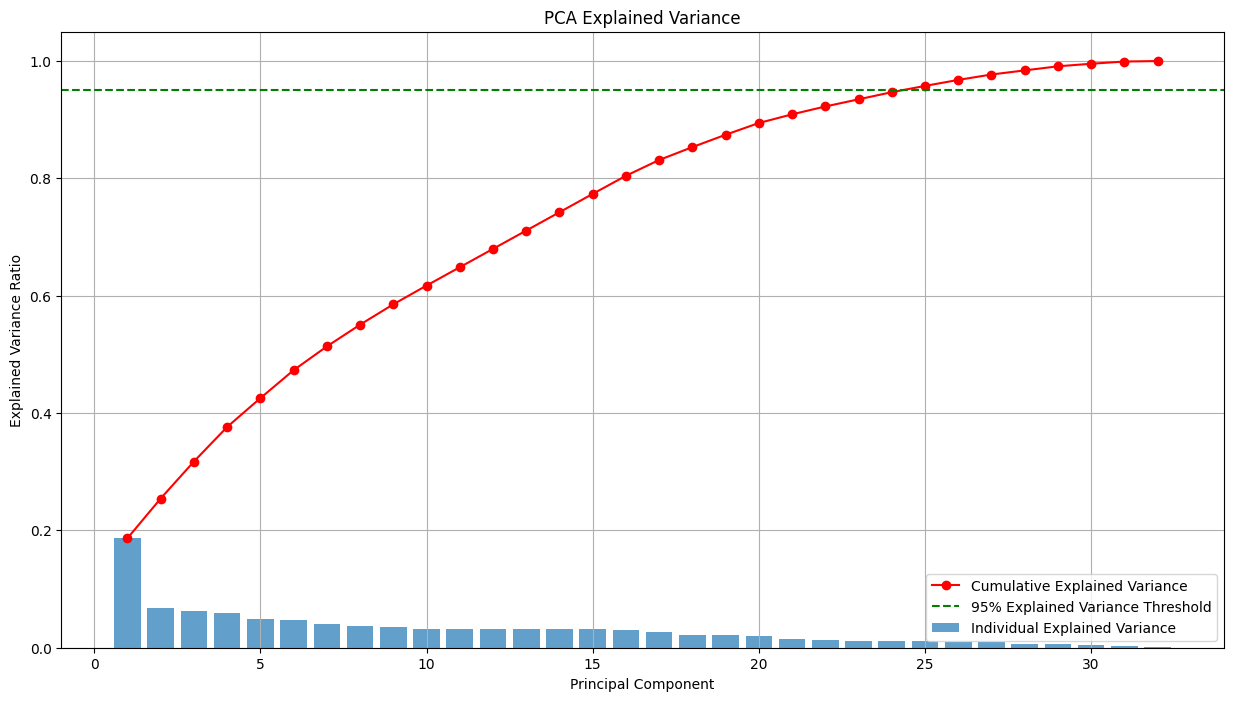

In [17]:
# Perform PCA and plot explained variance ratio
pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(15, 8))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Explained Variance Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier

In [19]:
feature_names = df.drop('attack_cat', axis=1).columns.tolist()
print(feature_names)

['dur', 'proto', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'is_ftp_login', 'ct_flw_http_mthd', 'ct_src_ltm', 'state_CON', 'state_ECO', 'state_INT', 'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_no']


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
import numpy as np
from deap import base, creator, tools, algorithms

# Use the already scaled X and y
n_features = X.shape[1]
estimator = DecisionTreeClassifier(random_state=42)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_individual(individual):
    if sum(individual) == 0:
        return 0.0,
    selected_features = [i for i, bit in enumerate(individual) if bit]
    X_selected = X[:, selected_features]
    clf = clone(estimator)
    scores = cross_val_score(clf, X_selected, y, cv=3, scoring='accuracy')
    return scores.mean(),

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run GA
population = toolbox.population(n=20)
NGEN = 10
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Get the best individual
top_ind = tools.selBest(population, k=1)[0]
selected_features_idx = [i for i, bit in enumerate(top_ind) if bit]
selected_feature_names = [feature_names[i] for i in selected_features_idx]
print("Selected features:", selected_feature_names)

Selected features: ['proto', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dinpkt', 'djit', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'ct_srv_src', 'ct_state_ttl', 'is_ftp_login', 'ct_flw_http_mthd', 'state_CON', 'state_PAR', 'state_REQ', 'state_RST', 'state_URN']


In [24]:
# Ensure feature_names contains all features in selected_feature_names (no duplicates)
feature_names = list(dict.fromkeys(selected_feature_names))

# Update the dataframe to only include the selected features and the target
df = df[feature_names + ['attack_cat']]

In [25]:
feature_names

['proto',
 'spkts',
 'dpkts',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dinpkt',
 'djit',
 'stcpb',
 'dtcpb',
 'smean',
 'dmean',
 'trans_depth',
 'ct_srv_src',
 'ct_state_ttl',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'state_CON',
 'state_PAR',
 'state_REQ',
 'state_RST',
 'state_URN']

In [26]:
df

,proto,spkts,dpkts,rate,sttl,dttl,sload,dinpkt,djit,stcpb,...,ct_srv_src,ct_state_ttl,is_ftp_login,ct_flw_http_mthd,state_CON,state_PAR,state_REQ,state_RST,state_URN,attack_cat
0,0.455946,6,4,74.087490,252,254,14158.942380,8.375000,11.830604,621772692,...,1,0,0,0,0,0,0,0,0,6
1,0.455946,14,38,78.473372,62,252,8395.112305,15.432865,1387.778330,1417884146,...,43,1,0,0,0,0,0,0,0,6
2,0.455946,8,16,14.170161,62,252,1572.271851,102.737203,11420.926230,2116150707,...,7,1,0,0,0,0,0,0,0,6
3,0.455946,12,12,13.677108,62,252,2740.178955,90.235726,4991.784669,1107119177,...,1,1,1,0,0,0,0,0,0,6
4,0.455946,10,6,33.373826,254,252,8561.499023,75.659602,115.807000,2436137549,...,43,1,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558342,0.455946,10,6,57.970149,254,252,28449.327358,43.223739,62.135439,605580072,...,1,1,0,1,0,0,0,0,0,9
558343,0.455946,10,6,60.140376,254,252,35639.533783,45.535028,73.550779,585881206,...,1,1,0,1,0,0,0,0,0,9
558344,0.455946,10,6,59.410996,254,252,32272.187047,44.086250,64.145125,723474758,...,1,1,0,1,0,0,0,0,0,9
558345,0.455946,10,6,55.131802,254,252,27867.775022,47.462765,71.987145,558761214,...,1,1,0,1,0,0,0,0,0,9


In [27]:
X = df.drop(columns='attack_cat')
y = df['attack_cat']

In [28]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Full model
model = LogisticRegression()
model.fit(X_train, y_train)
logistic_pred_before = model.predict(X_test)
log_accuracy_before = accuracy_score(y_test, logistic_pred_before)
print(f"Full model accuracy: {log_accuracy_before:.4f}")

Full model accuracy: 0.5334


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Full model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
tree_pred_before = model.predict(X_test)
tree_accuracy_before = accuracy_score(y_test, tree_pred_before)
print(f"Full model accuracy: {tree_accuracy_before:.4f}")

Full model accuracy: 0.7162


In [32]:
# Full model
model = RandomForestClassifier()
model.fit(X_train, y_train)
forest_pred_before = model.predict(X_test)
forest_accuracy_before = accuracy_score(y_test, forest_pred_before)
print(f"Full model accuracy: {forest_accuracy_before:.4f}")

Full model accuracy: 0.7404


In [33]:
# Full model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
knn_pred_before = model.predict(X_test)
knn_accuracy_before = accuracy_score(y_test, knn_pred_before)
print(f"Full model accuracy: {knn_accuracy_before:.4f}")

Full model accuracy: 0.7007


In [34]:
# Full model
model = XGBClassifier()
model.fit(X_train, y_train)
xg_pred_before = model.predict(X_test)
xg_accuracy_before = accuracy_score(y_test, xg_pred_before)
print(f"Full model accuracy: {xg_accuracy_before:.4f}")

Full model accuracy: 0.7193


In [35]:
# Full model
model = LGBMClassifier()
model.fit(X_train, y_train)
lg_pred_before = model.predict(X_test)
lg_accuracy_before = accuracy_score(y_test, lg_pred_before)
print(f"Full model accuracy: {lg_accuracy_before:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3138
[LightGBM] [Info] Number of data points in the train set: 446677, number of used features: 21
[LightGBM] [Info] Start training from score -2.307133
[LightGBM] [Info] Start training from score -2.302220
[LightGBM] [Info] Start training from score -2.273238
[LightGBM] [Info] Start training from score -2.297977
[LightGBM] [Info] Start training from score -2.344013
[LightGBM] [Info] Start training from score -2.302825
[LightGBM] [Info] Start training from score -2.299471
[LightGBM] [Info] Start training from score -2.303138
[LightGBM] [Info] Start training from score -2.296107
[LightGBM] [Info] Start training from score -2.301057


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Full model accuracy: 0.7143


In [36]:
# Full model
model = BaggingClassifier()
model.fit(X_train, y_train)
bg_pred_before = model.predict(X_test)
bg_accuracy_before = accuracy_score(y_test, bg_pred_before)
print(f"Full model accuracy: {bg_accuracy_before:.4f}")

Full model accuracy: 0.7328


In [43]:
parameters = {
    'max_iter': [1500],  # Ensure convergence
}

clf = LogisticRegression()
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_iter': 1500}


In [44]:
best_model = grid.best_estimator_
log_pred_after = best_model.predict(X_test)

In [45]:
log_accuracy_after = accuracy_score(y_test, log_pred_after)
print(f"Logistic Accuracy After Tuning: {log_accuracy_after:.4f}")

Logistic Accuracy After Tuning: 0.5422


In [40]:
parameters = {
    'criterion': ['gini'],         # use only 'gini' to reduce search space
    'max_depth': [25],         # smaller set of depths
    'min_samples_split': [5],   # reasonable defaults
    'min_samples_leaf': [5]     # fewer options
}

# Initialize model and GridSearchCV without StratifiedKFold (uses default 5-fold)
clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [41]:
best_model = grid.best_estimator_
tree_pred_after = best_model.predict(X_test)

In [42]:
tree_accuracy_after = accuracy_score(y_test, tree_pred_after)
print(f"Decision Tree Accuracy After Tuning: {tree_accuracy_after:.4f}")

Decision Tree Accuracy After Tuning: 0.7162


In [46]:
parameters = {
    'n_estimators': [100],           # default reasonable size
    'max_depth': [None],             # no depth limit
    'min_samples_split': [2],        # default
    'min_samples_leaf': [1],         # default
    'max_features': ['sqrt'],        # default for classification
    'bootstrap': [True]              # faster and standard
}

# Use default cross-validation (5-fold)
clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [47]:
best_model = grid.best_estimator_
forest_pred_after = best_model.predict(X_test)

In [48]:
forest_accuracy_after = accuracy_score(y_test, forest_pred_after)
print(f"Random Forest Accuracy After Tuning: {forest_accuracy_after:.4f}")

Random Forest Accuracy After Tuning: 0.7398


In [50]:
parameters = {
    'n_neighbors': [5],             # Standard choice, good for most cases
    'weights': ['distance'],        # Better when data is scaled
    'p': [2],                       # Euclidean distance
    'algorithm': ['auto'],          # Let scikit-learn choose the best
    'leaf_size': [40]               # Default value
}

# Use default cross-validation (5-fold)
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [51]:
best_model = grid.best_estimator_
knn_pred_after = best_model.predict(X_test)

In [52]:
knn_accuracy_after = accuracy_score(y_test, knn_pred_after)
print(f"KNN Accuracy After Tuning: {knn_accuracy_after:.4f}")

KNN Accuracy After Tuning: 0.7107


In [53]:
parameters = {
    'n_estimators': [500],
    'max_depth': [None],
    'learning_rate': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_alpha': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1]
}

# Use default cross-validation (5-fold)
clf = XGBClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8}


In [54]:
best_model = grid.best_estimator_
xg_pred_after = best_model.predict(X_test)

In [55]:
xg_accuracy_after = accuracy_score(y_test, xg_pred_after)
print(f"KNN Accuracy After Tuning: {xg_accuracy_after:.4f}")

KNN Accuracy After Tuning: 0.7344


In [56]:
parameters = {
    'n_estimators': [500],
    'max_depth': [None],
    'learning_rate': [0.1],
    'subsample': [0.8],           # same as bagging_fraction in LGBM
    'colsample_bytree': [0.8],   # same as feature_fraction in LGBM
    'min_child_samples': [20],   # controls overfitting
    'reg_alpha': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1],
}
clf = LGBMClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.149570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3138
[LightGBM] [Info] Number of data points in the train set: 446677, number of used features: 21
[LightGBM] [Info] Start training from score -2.307133
[LightGBM] [Info] Start training from score -2.302220
[LightGBM] [Info] Start training from score -2.273238
[LightGBM] [Info] Start training from score -2.297977
[LightGBM] [Info] Start training from score -2.344013
[LightGBM] [Info] Start training from score -2.302825
[LightGBM] [Info] Start training from score -2.299471
[LightGBM] [Info] Start training from score -2.303138
[LightGBM] [Info] Start training from score -2.296107
[LightGBM] [Info] Start training from score -2.301057
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'min_child_samples': 20, 'n

In [57]:
best_model = grid.best_estimator_
lg_pred_after = best_model.predict(X_test)

c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [58]:
lg_accuracy_after = accuracy_score(y_test, lg_pred_after)
print(f"KNN Accuracy After Tuning: {lg_accuracy_after:.4f}")

KNN Accuracy After Tuning: 0.7454


In [60]:
parameters = {
    'n_estimators': [100],        # number of base estimators
    'max_samples': [0.8],         # fraction of dataset for each base learner
    'max_features': [0.8],        # fraction of features per learner
    'bootstrap': [True],          # with replacement
    'bootstrap_features': [False], # no resampling of features
    'random_state': [42]          # reproducibility
}
clf = BaggingClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100, 'random_state': 42}


In [61]:
best_model = grid.best_estimator_
bg_pred_after = best_model.predict(X_test)

In [62]:
bg_accuracy_after = accuracy_score(y_test, bg_pred_after)
print(f"KNN Accuracy After Tuning: {bg_accuracy_after:.4f}")

KNN Accuracy After Tuning: 0.7425


In [63]:
print("Classification Report:\n", classification_report(y_test, logistic_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.30      0.33     11185
           1       0.26      0.52      0.35     11097
           2       0.26      0.15      0.19     11542
           3       0.53      0.40      0.46     11294
           4       0.62      0.56      0.59     10821
           5       0.85      0.70      0.77     11153
           6       0.93      0.74      0.82     11193
           7       0.47      0.43      0.45     11114
           8       0.56      0.77      0.65     11026
           9       0.75      0.78      0.77     11245

    accuracy                           0.53    111670
   macro avg       0.56      0.54      0.54    111670
weighted avg       0.56      0.53      0.54    111670



In [64]:
print("Classification Report:\n", classification_report(y_test, log_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.32      0.34     11185
           1       0.26      0.50      0.34     11097
           2       0.26      0.16      0.19     11542
           3       0.53      0.40      0.46     11294
           4       0.62      0.55      0.58     10821
           5       0.85      0.70      0.77     11153
           6       0.93      0.74      0.82     11193
           7       0.55      0.44      0.49     11114
           8       0.57      0.85      0.68     11026
           9       0.75      0.78      0.76     11245

    accuracy                           0.54    111670
   macro avg       0.57      0.54      0.54    111670
weighted avg       0.57      0.54      0.54    111670



In [65]:
print("Classification Report:\n", classification_report(y_test, tree_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.46      0.49     11185
           1       0.46      0.51      0.48     11097
           2       0.38      0.57      0.46     11542
           3       0.66      0.47      0.55     11294
           4       0.79      0.75      0.77     10821
           5       0.90      0.87      0.89     11153
           6       0.91      0.89      0.90     11193
           7       0.81      0.70      0.75     11114
           8       0.92      0.95      0.94     11026
           9       0.99      0.99      0.99     11245

    accuracy                           0.72    111670
   macro avg       0.74      0.72      0.72    111670
weighted avg       0.73      0.72      0.72    111670



In [66]:
print("Classification Report:\n", classification_report(y_test, tree_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50     11185
           1       0.45      0.54      0.49     11097
           2       0.39      0.56      0.46     11542
           3       0.68      0.47      0.56     11294
           4       0.82      0.76      0.79     10821
           5       0.92      0.85      0.89     11153
           6       0.93      0.88      0.90     11193
           7       0.87      0.68      0.77     11114
           8       0.90      0.94      0.92     11026
           9       0.98      0.99      0.99     11245

    accuracy                           0.72    111670
   macro avg       0.74      0.72      0.72    111670
weighted avg       0.74      0.72      0.72    111670



In [67]:
print("Classification Report:\n", classification_report(y_test, forest_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50     11185
           1       0.47      0.52      0.50     11097
           2       0.41      0.59      0.48     11542
           3       0.71      0.54      0.61     11294
           4       0.81      0.82      0.81     10821
           5       0.93      0.89      0.91     11153
           6       0.96      0.88      0.92     11193
           7       0.83      0.73      0.78     11114
           8       0.93      0.98      0.96     11026
           9       0.99      1.00      0.99     11245

    accuracy                           0.74    111670
   macro avg       0.76      0.74      0.75    111670
weighted avg       0.76      0.74      0.75    111670



In [68]:
print("Classification Report:\n", classification_report(y_test, forest_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.47      0.50     11185
           1       0.47      0.52      0.50     11097
           2       0.41      0.59      0.48     11542
           3       0.71      0.53      0.61     11294
           4       0.81      0.82      0.81     10821
           5       0.93      0.89      0.91     11153
           6       0.96      0.88      0.92     11193
           7       0.83      0.73      0.78     11114
           8       0.93      0.98      0.96     11026
           9       0.99      1.00      1.00     11245

    accuracy                           0.74    111670
   macro avg       0.76      0.74      0.75    111670
weighted avg       0.76      0.74      0.74    111670



In [69]:
print("Classification Report:\n", classification_report(y_test, knn_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.57      0.48     11185
           1       0.46      0.47      0.47     11097
           2       0.39      0.45      0.42     11542
           3       0.63      0.45      0.53     11294
           4       0.77      0.73      0.75     10821
           5       0.92      0.86      0.89     11153
           6       0.95      0.83      0.89     11193
           7       0.78      0.67      0.72     11114
           8       0.90      0.98      0.94     11026
           9       0.97      1.00      0.98     11245

    accuracy                           0.70    111670
   macro avg       0.72      0.70      0.71    111670
weighted avg       0.72      0.70      0.71    111670



In [70]:
print("Classification Report:\n", classification_report(y_test, knn_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.52      0.48     11185
           1       0.47      0.47      0.47     11097
           2       0.40      0.47      0.43     11542
           3       0.64      0.47      0.54     11294
           4       0.78      0.75      0.77     10821
           5       0.90      0.89      0.90     11153
           6       0.95      0.85      0.89     11193
           7       0.76      0.71      0.73     11114
           8       0.92      0.99      0.95     11026
           9       0.98      1.00      0.99     11245

    accuracy                           0.71    111670
   macro avg       0.72      0.71      0.71    111670
weighted avg       0.72      0.71      0.71    111670



In [71]:

print("Classification Report:\n", classification_report(y_test, xg_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.53      0.50     11185
           1       0.45      0.51      0.48     11097
           2       0.37      0.55      0.44     11542
           3       0.79      0.48      0.59     11294
           4       0.81      0.78      0.80     10821
           5       0.94      0.86      0.90     11153
           6       0.96      0.87      0.91     11193
           7       0.90      0.70      0.78     11114
           8       0.87      0.95      0.91     11026
           9       0.97      0.99      0.98     11245

    accuracy                           0.72    111670
   macro avg       0.75      0.72      0.73    111670
weighted avg       0.75      0.72      0.73    111670



In [72]:
print("Classification Report:\n", classification_report(y_test, xg_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     11185
           1       0.45      0.57      0.50     11097
           2       0.39      0.56      0.46     11542
           3       0.79      0.50      0.61     11294
           4       0.83      0.80      0.82     10821
           5       0.95      0.87      0.91     11153
           6       0.96      0.88      0.92     11193
           7       0.92      0.71      0.80     11114
           8       0.90      0.97      0.93     11026
           9       0.98      1.00      0.99     11245

    accuracy                           0.73    111670
   macro avg       0.77      0.74      0.74    111670
weighted avg       0.77      0.73      0.74    111670



In [73]:
print("Classification Report:\n", classification_report(y_test, lg_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.54      0.50     11185
           1       0.45      0.50      0.47     11097
           2       0.36      0.53      0.43     11542
           3       0.77      0.46      0.58     11294
           4       0.80      0.78      0.79     10821
           5       0.93      0.85      0.89     11153
           6       0.96      0.86      0.91     11193
           7       0.90      0.69      0.78     11114
           8       0.87      0.95      0.91     11026
           9       0.97      0.99      0.98     11245

    accuracy                           0.71    111670
   macro avg       0.75      0.72      0.72    111670
weighted avg       0.75      0.71      0.72    111670



In [74]:
print("Classification Report:\n", classification_report(y_test, lg_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51     11185
           1       0.47      0.57      0.51     11097
           2       0.41      0.58      0.48     11542
           3       0.82      0.51      0.63     11294
           4       0.84      0.81      0.83     10821
           5       0.96      0.88      0.92     11153
           6       0.96      0.88      0.92     11193
           7       0.93      0.72      0.81     11114
           8       0.93      0.98      0.95     11026
           9       0.99      1.00      0.99     11245

    accuracy                           0.75    111670
   macro avg       0.78      0.75      0.76    111670
weighted avg       0.78      0.75      0.75    111670



In [75]:
print("Classification Report:\n", classification_report(y_test, bg_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.48      0.50     11185
           1       0.47      0.52      0.49     11097
           2       0.40      0.59      0.48     11542
           3       0.70      0.51      0.59     11294
           4       0.81      0.80      0.80     10821
           5       0.93      0.88      0.90     11153
           6       0.95      0.88      0.91     11193
           7       0.84      0.72      0.77     11114
           8       0.93      0.97      0.95     11026
           9       0.99      1.00      0.99     11245

    accuracy                           0.73    111670
   macro avg       0.75      0.73      0.74    111670
weighted avg       0.75      0.73      0.74    111670



In [76]:
print("Classification Report:\n", classification_report(y_test, bg_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50     11185
           1       0.47      0.52      0.50     11097
           2       0.40      0.62      0.49     11542
           3       0.76      0.52      0.62     11294
           4       0.83      0.82      0.82     10821
           5       0.94      0.89      0.91     11153
           6       0.97      0.88      0.92     11193
           7       0.85      0.73      0.79     11114
           8       0.94      0.98      0.96     11026
           9       0.99      1.00      0.99     11245

    accuracy                           0.74    111670
   macro avg       0.77      0.74      0.75    111670
weighted avg       0.77      0.74      0.75    111670



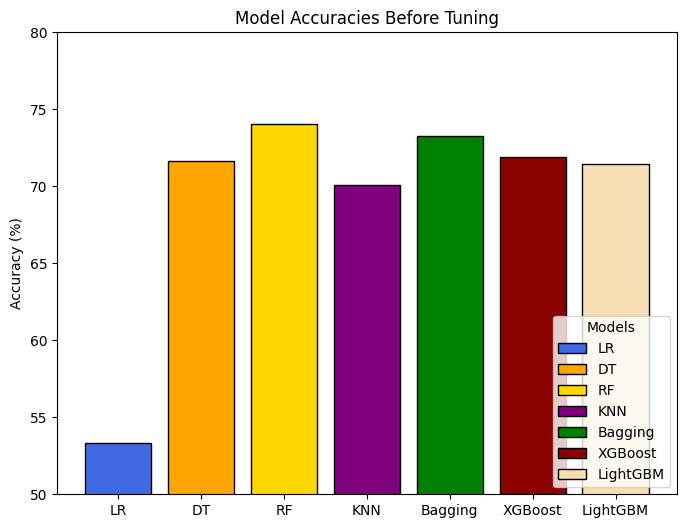

In [78]:
from matplotlib.patches import Patch

# Accuracies before tuning
accuracies = [
    log_accuracy_before,   # Logistic Regression
    tree_accuracy_before,  # Decision Tree
    forest_accuracy_before, # Random Forest
    knn_accuracy_before,   # KNN
    bg_accuracy_before,                  # AdaBoost (not computed)
    xg_accuracy_before,    # XGBoost
    lg_accuracy_before,    # LightGBM
]

# Model names and colors as in the image
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM',]
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

# Remove None values for plotting (if AdaBoost/Proposed not available)
plot_names = [n for n, a in zip(model_names, accuracies) if a is not None]
plot_accs = [a*100 for a in accuracies if a is not None]
plot_colors = [c for c, a in zip(colors, accuracies) if a is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_accs, color=plot_colors, edgecolor='black')

plt.ylim(50, 80)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies Before Tuning')

# Custom legend
legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

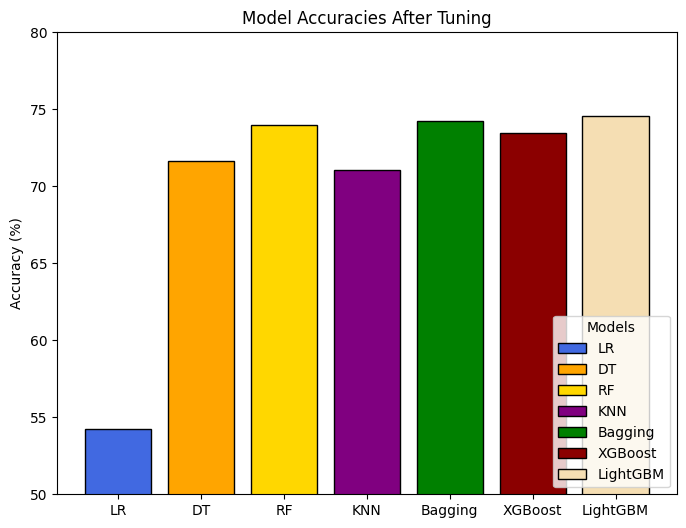

In [79]:
# Accuracies before tuning
accuracies = [
    log_accuracy_after,   # Logistic Regression
    tree_accuracy_after,  # Decision Tree
    forest_accuracy_after, # Random Forest
    knn_accuracy_after,   # KNN
    bg_accuracy_after,                  # AdaBoost (not computed)
    xg_accuracy_after,    # XGBoost
    lg_accuracy_after,    # LightGBM
]

# Model names and colors as in the image
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

# Remove None values for plotting (if AdaBoost/Proposed not available)
plot_names = [n for n, a in zip(model_names, accuracies) if a is not None]
plot_accs = [a*100 for a in accuracies if a is not None]
plot_colors = [c for c, a in zip(colors, accuracies) if a is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_accs, color=plot_colors, edgecolor='black')

plt.ylim(50, 80)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies After Tuning')

# Custom legend
legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

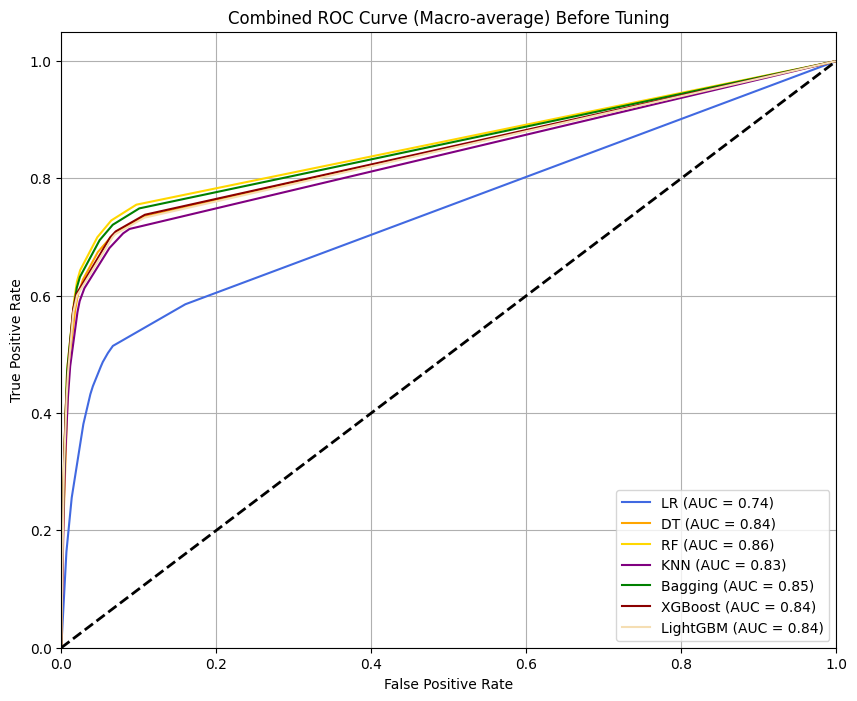

In [80]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output for multiclass ROC
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Collect predictions for all models before tuning
model_preds = [
    logistic_pred_before,  # Logistic Regression
    tree_pred_before,      # Decision Tree
    forest_pred_before,    # Random Forest
    knn_pred_before,       # KNN
    bg_pred_before,        # Bagging
    xg_pred_before,        # XGBoost
    lg_pred_before         # LightGBM
]
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = cycle(['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat'])

plt.figure(figsize=(10, 8))

for preds, name, color in zip(model_preds, model_names, colors):
    # Binarize predictions
    preds_bin = label_binarize(preds, classes=range(n_classes))
    # Compute ROC curve and ROC area for each class, then average (macro)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, color=color, label=f'{name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve (Macro-average) Before Tuning')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

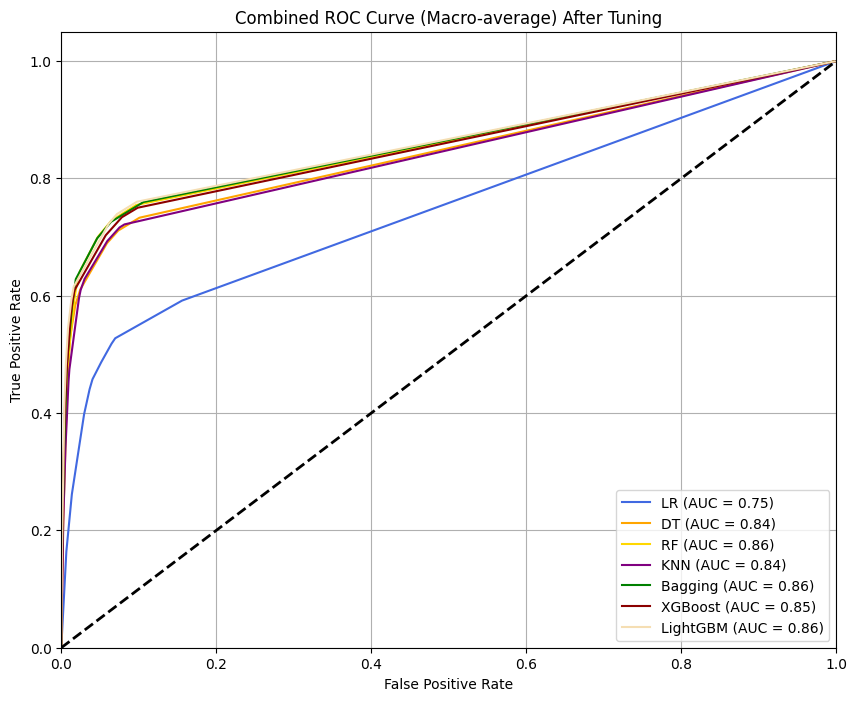

In [81]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output for multiclass ROC
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Collect predictions for all models before tuning
model_preds = [
    log_pred_after,  # Logistic Regression
    tree_pred_after,      # Decision Tree
    forest_pred_after,    # Random Forest
    knn_pred_after,       # KNN
    bg_pred_after,        # Bagging
    xg_pred_after,        # XGBoost
    lg_pred_after         # LightGBM
]
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = cycle(['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat'])

plt.figure(figsize=(10, 8))

for preds, name, color in zip(model_preds, model_names, colors):
    # Binarize predictions
    preds_bin = label_binarize(preds, classes=range(n_classes))
    # Compute ROC curve and ROC area for each class, then average (macro)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, color=color, label=f'{name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve (Macro-average) After Tuning')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

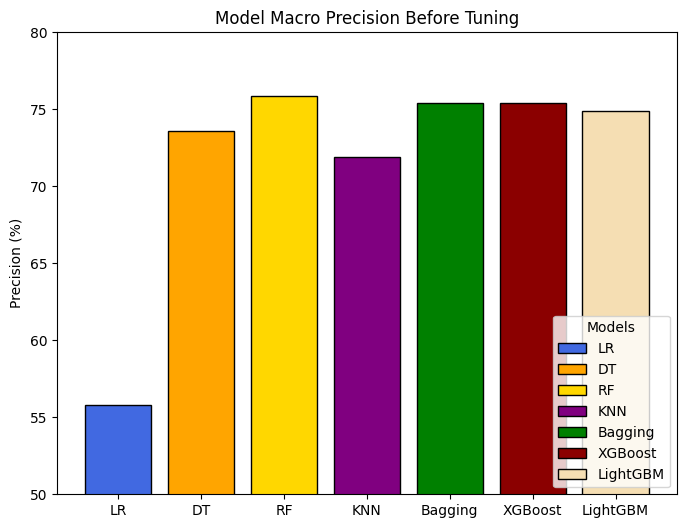

In [83]:
from sklearn.metrics import precision_score

# Calculate macro precision for each model before tuning
precisions = [
    precision_score(y_test, logistic_pred_before, average='macro'),
    precision_score(y_test, tree_pred_before, average='macro'),
    precision_score(y_test, forest_pred_before, average='macro'),
    precision_score(y_test, knn_pred_before, average='macro'),
    precision_score(y_test, bg_pred_before, average='macro'),
    precision_score(y_test, xg_pred_before, average='macro'),
    precision_score(y_test, lg_pred_before, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, p in zip(model_names, precisions) if p is not None]
plot_precs = [p*100 for p in precisions if p is not None]
plot_colors = [c for c, p in zip(colors, precisions) if p is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_precs, color=plot_colors, edgecolor='black')

plt.ylim(50, 80)
plt.ylabel('Precision (%)')
plt.title('Model Macro Precision Before Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

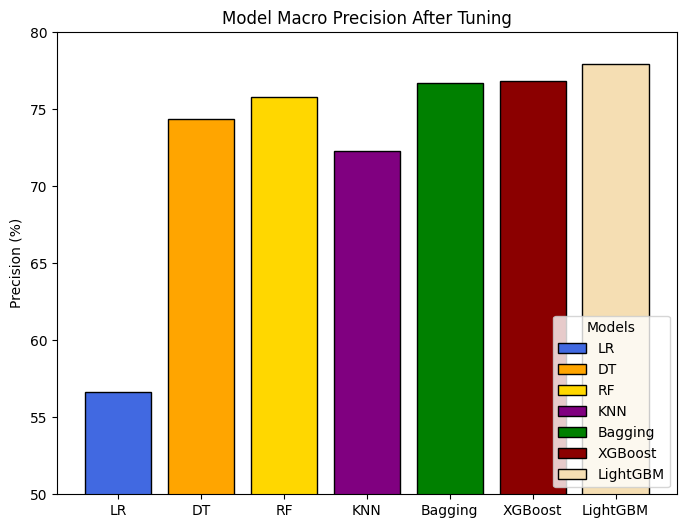

In [85]:
from sklearn.metrics import precision_score

# Calculate macro precision for each model after tuning
precisions_after = [
    precision_score(y_test, log_pred_after, average='macro'),
    precision_score(y_test, tree_pred_after, average='macro'),
    precision_score(y_test, forest_pred_after, average='macro'),
    precision_score(y_test, knn_pred_after, average='macro'),
    precision_score(y_test, bg_pred_after, average='macro'),
    precision_score(y_test, xg_pred_after, average='macro'),
    precision_score(y_test, lg_pred_after, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, p in zip(model_names, precisions_after) if p is not None]
plot_precs = [p*100 for p in precisions_after if p is not None]
plot_colors = [c for c, p in zip(colors, precisions_after) if p is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_precs, color=plot_colors, edgecolor='black')

plt.ylim(50, 80)
plt.ylabel('Precision (%)')
plt.title('Model Macro Precision After Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

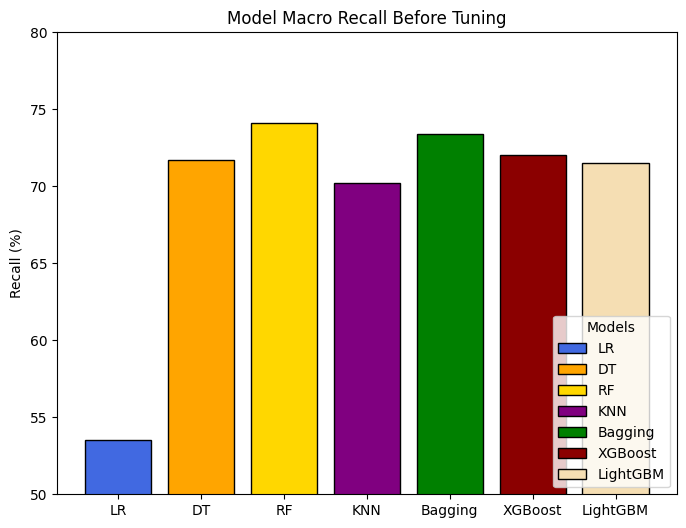

In [87]:
from sklearn.metrics import recall_score

# Calculate macro recall for each model before tuning
recalls = [
    recall_score(y_test, logistic_pred_before, average='macro'),
    recall_score(y_test, tree_pred_before, average='macro'),
    recall_score(y_test, forest_pred_before, average='macro'),
    recall_score(y_test, knn_pred_before, average='macro'),
    recall_score(y_test, bg_pred_before, average='macro'),
    recall_score(y_test, xg_pred_before, average='macro'),
    recall_score(y_test, lg_pred_before, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, r in zip(model_names, recalls) if r is not None]
plot_recalls = [r*100 for r in recalls if r is not None]
plot_colors = [c for c, r in zip(colors, recalls) if r is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_recalls, color=plot_colors, edgecolor='black')

plt.ylim(50, 80)
plt.ylabel('Recall (%)')
plt.title('Model Macro Recall Before Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')


plt.show()

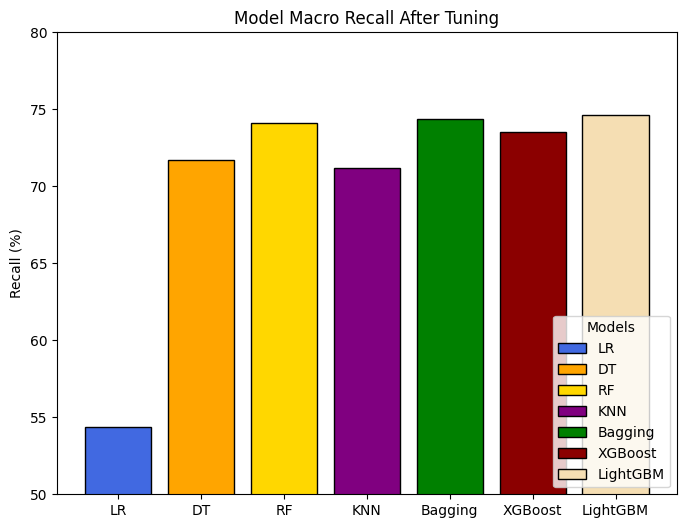

In [89]:
from sklearn.metrics import recall_score

# Calculate macro recall for each model after tuning
recalls_after = [
    recall_score(y_test, log_pred_after, average='macro'),
    recall_score(y_test, tree_pred_after, average='macro'),
    recall_score(y_test, forest_pred_after, average='macro'),
    recall_score(y_test, knn_pred_after, average='macro'),
    recall_score(y_test, bg_pred_after, average='macro'),
    recall_score(y_test, xg_pred_after, average='macro'),
    recall_score(y_test, lg_pred_after, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, r in zip(model_names, recalls_after) if r is not None]
plot_recalls = [r*100 for r in recalls_after if r is not None]
plot_colors = [c for c, r in zip(colors, recalls_after) if r is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_recalls, color=plot_colors, edgecolor='black')

plt.ylim(50, 80)
plt.ylabel('Recall (%)')
plt.title('Model Macro Recall After Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

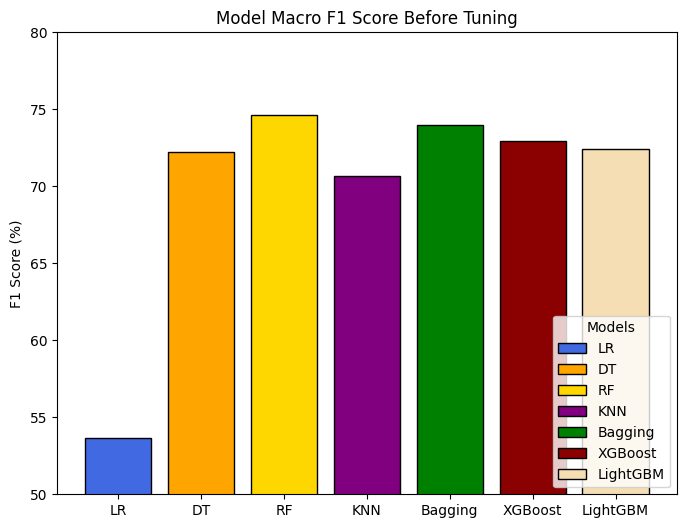

In [90]:
from sklearn.metrics import f1_score

# Calculate macro F1 for each model before tuning
f1s = [
    f1_score(y_test, logistic_pred_before, average='macro'),
    f1_score(y_test, tree_pred_before, average='macro'),
    f1_score(y_test, forest_pred_before, average='macro'),
    f1_score(y_test, knn_pred_before, average='macro'),
    f1_score(y_test, bg_pred_before, average='macro'),
    f1_score(y_test, xg_pred_before, average='macro'),
    f1_score(y_test, lg_pred_before, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, f in zip(model_names, f1s) if f is not None]
plot_f1s = [f*100 for f in f1s if f is not None]
plot_colors = [c for c, f in zip(colors, f1s) if f is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_f1s, color=plot_colors, edgecolor='black')

plt.ylim(50, 80)
plt.ylabel('F1 Score (%)')
plt.title('Model Macro F1 Score Before Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

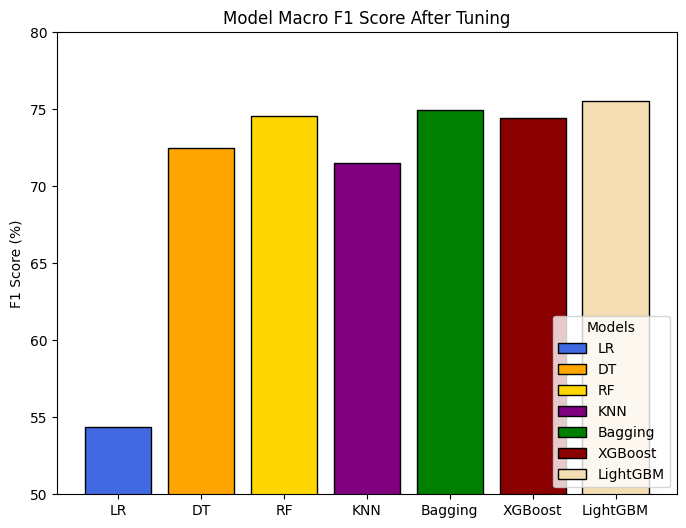

In [91]:
from sklearn.metrics import f1_score

# Calculate macro F1 for each model before tuning
f1s = [
    f1_score(y_test, log_pred_after, average='macro'),
    f1_score(y_test, tree_pred_after, average='macro'),
    f1_score(y_test, forest_pred_after, average='macro'),
    f1_score(y_test, knn_pred_after, average='macro'),
    f1_score(y_test, bg_pred_after, average='macro'),
    f1_score(y_test, xg_pred_after, average='macro'),
    f1_score(y_test, lg_pred_after, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, f in zip(model_names, f1s) if f is not None]
plot_f1s = [f*100 for f in f1s if f is not None]
plot_colors = [c for c, f in zip(colors, f1s) if f is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_f1s, color=plot_colors, edgecolor='black')

plt.ylim(50, 80)
plt.ylabel('F1 Score (%)')
plt.title('Model Macro F1 Score After Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()